# $$ \color{Black}{2020\ Kaggle\ ML\ and\ DS\ Survey} $$ 


#### $$ \color{Black}{The\ most\ comprehensive\ dataset\ available\ on\ the\ state\ of\ ML\ and\ Data\ Science} $$ 


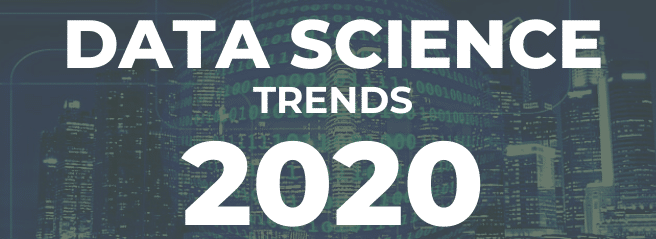

# Importing Important Libraries:

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

# Read and Display first 5 rows:

In [ ]:
df = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv",header=1)
df.head()

# Number of Responds for the survey:

In [ ]:
print("In '2020 Kaggle ML & DS Survey', {} had attended the survey.".format(df.shape[0]))

# Function to plot frequency chart:

In [ ]:
def plot_frequency_charts(df, feature, title, xlabel, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency and percentage of {}'.format(title),weight='bold', size=15)
    plt.ylabel('Frequency', size=12, weight='bold')
    plt.xlabel(xlabel, size=12, weight='bold')
    plt.xticks(rotation=90)
    plt.show()

# Frequency and percentage of:

# 1. Age Group:

In [ ]:
plot_frequency_charts(df, 'What is your age (# years)?', 'age group','Age Group', 'inferno')

# 2. Gender:

In [ ]:
plot_frequency_charts(df, 'What is your gender? - Selected Choice', 'gender','Gender', 'inferno')

# 3. Country:

In [ ]:
df['In which country do you currently reside?'] = df['In which country do you currently reside?'].replace(
    {'United Kingdom of Great Britain and Northern Ireland':'UK and Northern Ireland'})

plot_frequency_charts(df, 'In which country do you currently reside?', 'responders currently reside in','Country', 'winter')

# Time taken to fillform - genderwise:

In [ ]:
df_gender_time = df.groupby(['What is your gender? - Selected Choice']).agg({'Duration (in seconds)':'mean'}).reset_index()

f, ax = plt.subplots(1,1, figsize=(15,5))

splot = sns.barplot(df_gender_time['What is your gender? - Selected Choice'],
                                   df_gender_time['Duration (in seconds)'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Average time taken to fill the form - genderwise',weight='bold', size=15)
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Time Taken in seconds', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

# 4. Education:

In [ ]:
df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'] = df[
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].replace(
    {'Some college/university study without earning a bachelor’s degree':'study without earning degree'})

plot_frequency_charts(df, 
'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
"responder's education",'Education', 'brg')

# 5. Occupation:

In [ ]:
plot_frequency_charts(df, 
'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
"responder's occupation",'Occupations', 'winter')

# 6. Coding experience:

In [ ]:
plot_frequency_charts(df, 'For how many years have you been writing code and/or programming?',
                      "responder's coding experience",'Duration', 'viridis')

# 7. Programming Language:

In [ ]:
plot_frequency_charts(df,
    'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice',
                      "responder's recommend an aspiring data scientist to learn first",'Programming language', 'husl')

# 8. Type of Computing Platform:

In [ ]:
df['What type of computing platform do you use most often for your data science projects? - Selected Choice'] = df[
    'What type of computing platform do you use most often for your data science projects? - Selected Choice'].replace(
    {'A personal computer or laptop':'PC or Laptop',
     'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)':'Cloud platform',
     'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)':'Deep Learning workstation'})

plot_frequency_charts(df,
    'What type of computing platform do you use most often for your data science projects? - Selected Choice',
                      "type of computing platform used",'Platform', 'brg')

# 9. Number of times TPU used:

In [ ]:
plot_frequency_charts(df, 'Approximately how many times have you used a TPU (tensor processing unit)?',
                      "responder's used TPU (tensor processing unit)",'Occations', 'twilight')

# 10. Experience in ML methods:

In [ ]:
plot_frequency_charts(df,'For how many years have you used machine learning methods?',
                      "responder's used machine learning methods",'Duration', 'gnuplot2')

# 11. Size of Company:

In [ ]:
plot_frequency_charts(df,'What is the size of the company where you are employed?',
                      "responder's size of the company where you are employed",'Employees', 'gnuplot')

# 12. Yearly compensation:

In [ ]:
plot_frequency_charts(df,'What is your current yearly compensation (approximate $USD)?',
                      "responder's current yearly compensation",'approximate $USD', 'plasma')

# 13. Amount spent on ML in last 5years:

In [ ]:
plot_frequency_charts(df,'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?',
                      "responder spent on ML or Cloud in past 5 years",'approximate $USD', 'plasma_r')

# 14. Big data Products:

In [ ]:
plot_frequency_charts(df,'Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice',
                      "big data products responder often use",'Product Name', 'prism')

# 15. Business Intelligence Tools:

In [ ]:
plot_frequency_charts(df,'Which of the following business intelligence tools do you use most often? - Selected Choice',
                      "BI tools responder often use",'Product Name', 'tab20b')

# 16. Primary tools:

In [ ]:
df['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'] = df[
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'].replace(
    {'Local development environments (RStudio, JupyterLab, etc.)':'Local development environment',
     'Basic statistical software (Microsoft Excel, Google Sheets, etc.)':'Basic statistical software',
     'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)':'Business intelligence software',
     'Advanced statistical software (SPSS, SAS, etc.)':'Advanced statistical software',
     'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)':'Cloud-based data software & APIs'})

plot_frequency_charts(df,
'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice',
                      "primary tools responder often use at work or school to analyze data",'Product Name', 'rainbow')

### Do let me know your thoughts and suggestions so that I can improve.
# Happy Learning!!!